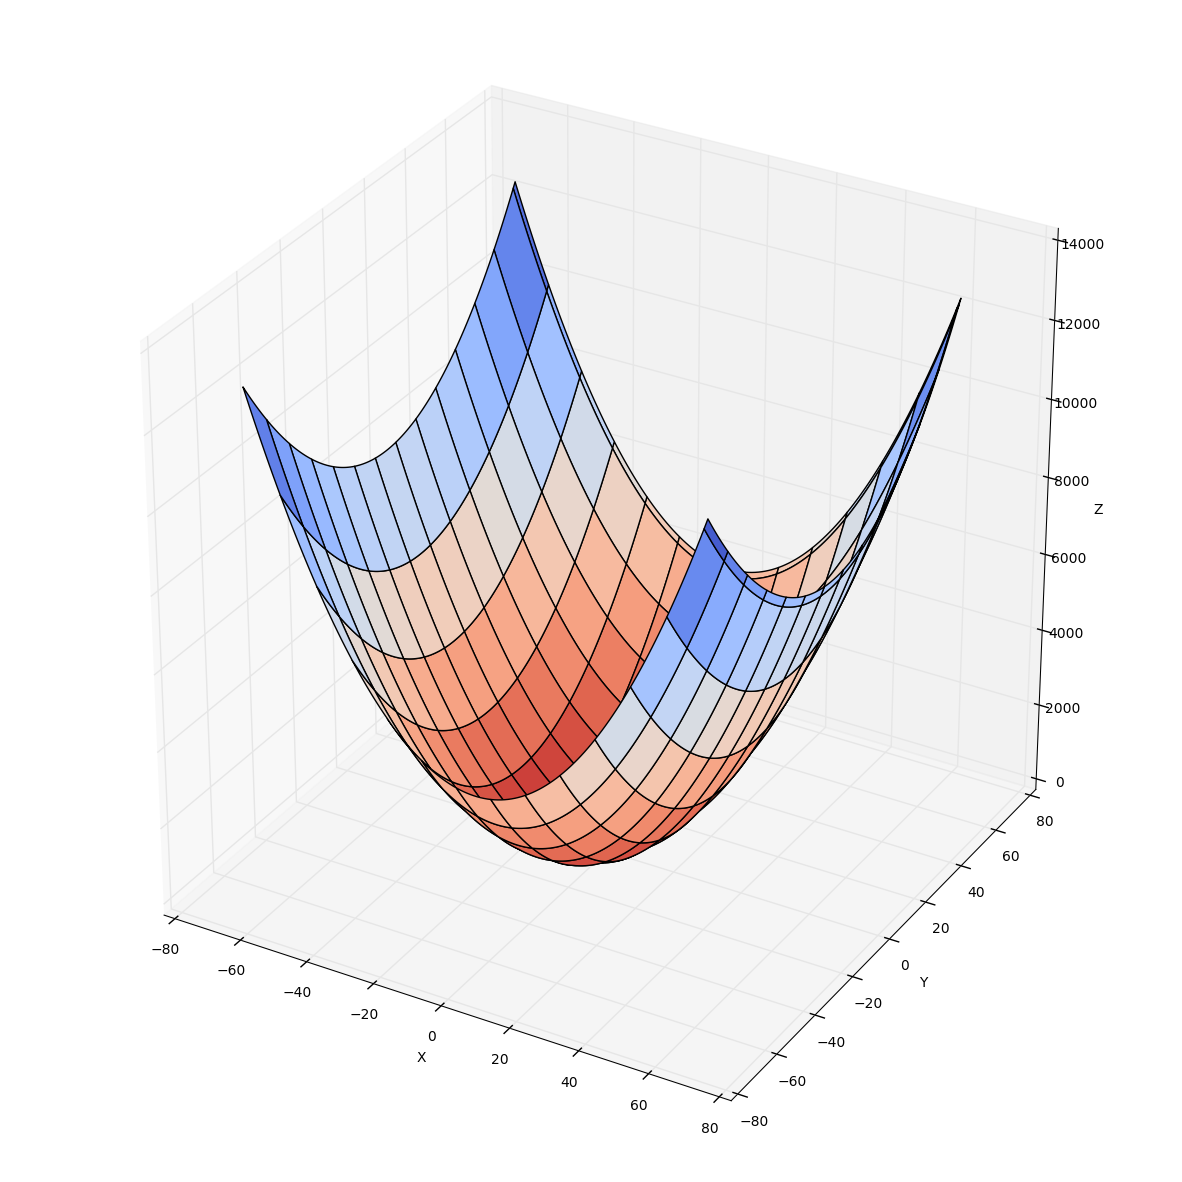

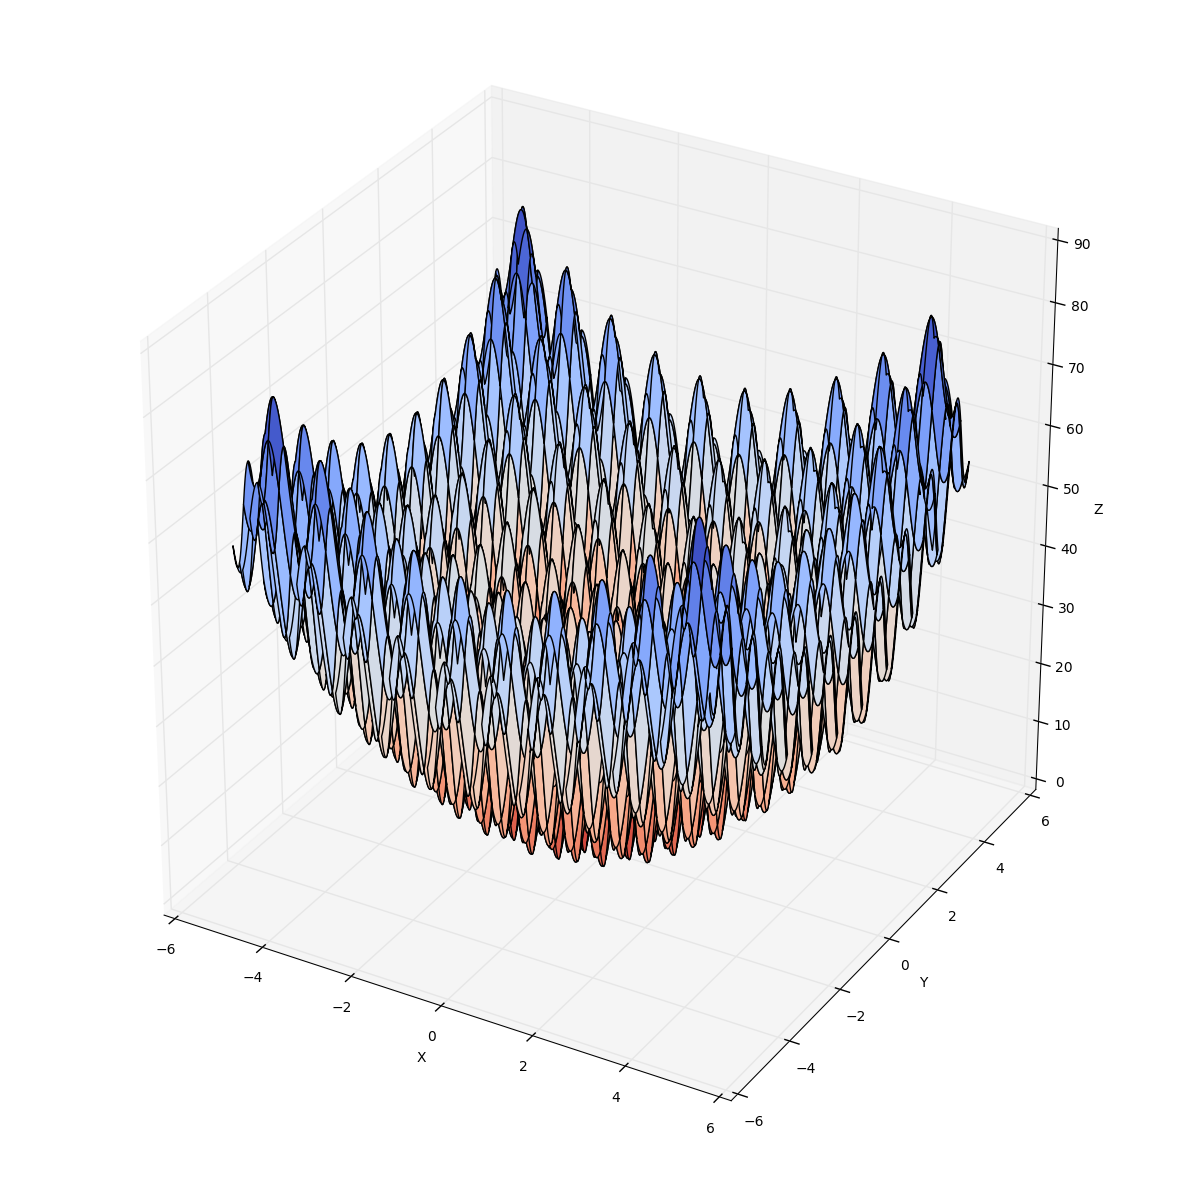

In [1]:
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import math 
from matplotlib import cm

def plot_3d(f,a,b,step):
    x = y = np.arange(a,b,step)
    X, Y = np.meshgrid(x, y)
    z = np.array([f([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = z.reshape(X.shape)
        
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm_r)

def plot_color_map(f,a,b,step):
    x = y = np.arange(a,b,step)
    X, Y = np.meshgrid(x, y)
    z = np.array([f([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = z.reshape(X.shape)

    fig = plt.figure(figsize=(20, 13))
    ax = fig.add_subplot(111)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.imshow(Z,extent=[a,b,a,b])
    plt.colorbar(orientation='vertical')

# def add_scatter(x,y):
#     plt.scatter(x, y, c=cm.rainbow(np.linspace(0, 1, len(x))), s=100)

def add_scatter(individuals):
    x,y=[],[]
    for ind in out:
        x+=[ind['coords'][0]]
        y+=[ind['coords'][1]]
    plt.scatter(x, y, c=cm.rainbow(np.linspace(0, 1, len(x))), s=100)

def hiper_elipsoide_rotado(coords):
    result = 0
    for i in range(1, len(coords)+1):
        for j in range(1, i+1):
            result += coords[j-1]**2
    return result

def rastrigin(coords):
    result = 0
    for xi in coords:
        result += (xi**2 - 10*math.cos(2*math.pi*xi))
    return 10*len(coords) + result

plot_3d(hiper_elipsoide_rotado, -65.54 , 65.54 , 1)
plot_3d(rastrigin, -5.12 , 5.12 , 0.02)

# plot_color_map(hiper_elipsoide_rotado, -65.54 , 65.54 , 1)
# plot_color_map(rastrigin, -5.12 , 5.12 , 0.02)

# x = np.random.random(20)*120-65
# y = np.random.random(20)*120-65
# add_scatter(x,y)


In [2]:
from collections import Iterable 
import math

# # default dimension
# dimension=10     
# # default sigma when first time creating the population
# sigma=1  
# # selection size (survivors size)
# mu=30 
# # offspring size - (competitors size)
# lamb=200
# # default max number of generations to perform
# max_generations=1000
# # default minimal sigma value
# min_sigma=0.1
# # evolution ends if one solution is found that 
# # differs from global maximun by this quantity
# termination_delta=0.001

# Represento los individuos como diccionarios con las propiedades:
#  - coords (coordenadas del individuo) 
#  - sigmas (parámetros sigma para el operador de mutación).
# Dado que en la práctica no se piden mutaciones correlacionadas,
# no agrego en la representación los parámetros alfa.
# Además, dado que en la práctica se piden experimentos
# de paso único y de n pasos determino que la propiedad sigmas
# de un individuo puede:
#  - tener un único elemento, en cuyo caso el comportamiento del 
#    algoritmo será de paso único:
individual_1 = {'coords':[1,2,3],'sigmas':[1]}
#  - o bien tener el mismo número de elementos que coords, en cuyo 
#    caso el comportamiento del algoritmo será de n pasos:
individual_2 = {'coords':[1,2,3],'sigmas':[2,3,1]}

def rand_individual(domain,dimension,step='n',sigma=1):    
    coords=np.random.uniform(domain[0],domain[1],dimension)
    if step=='one':
        sigmas=[sigma]
    elif step=='n':
        sigmas=[sigma]*dimension
    else:
        raise ValueError('Not a valid step')
    return {'coords':coords,'sigmas':sigmas}

# print(rand_individual([0,5],5))

def one_step_mutation(individual,min_sigma=0):
    coords,[sigma]=individual['coords'],individual['sigmas']
    n=len(coords)
    tau=1/math.sqrt(n)
    sigma_mut=sigma*math.exp(tau*np.random.normal())
    sigma_mut=sigma_mut if min_sigma<sigma_mut else sigma
    coords_mut=[x+sigma_mut*np.random.normal() for x in coords]
    return {'coords':coords_mut,'sigmas':[sigma_mut]}

# print(one_step_mutation(individual_1))

def n_step_mutation(individual,min_sigma=0):
    coords,sigmas=individual['coords'],individual['sigmas']
    n=len(coords)
    tau_1=1/math.sqrt(2*n)
    tau_2=1/math.sqrt(2*math.sqrt(n))
    common_norm=np.random.normal()
    sigmas_mut=[]
    coords_mut=[]
    for sigma,coord in zip(sigmas,coords):
        sigma_mut=sigma*math.exp(tau_1*common_norm + tau_2*np.random.normal())
        sigma_mut=sigma_mut if min_sigma<sigma_mut else sigma
        coord_mut=coord + sigma_mut*np.random.normal()
        sigmas_mut += [sigma_mut]
        coords_mut += [coord_mut]
    return {'coords':coords_mut,'sigmas':sigmas_mut}

# print(n_step_mutation(individual_2))

def discrete_recombination(ind_1,ind_2):
    sigmas_comb=[]
    coords_comb=[]
    both=[ind_1,ind_2]
    one_step= 1==len(ind_1['sigmas'])
    for i in range(len(ind_1['coords'])):
        j=np.random.choice([0,1])
        coords_comb+=[both[j]['coords'][i]]
        if one_step:
            sigmas_comb=[both[j]['sigmas'][i]]
        else:
            sigmas_comb+=[both[j]['sigmas'][i]]
    return {'coords':coords_comb,'sigmas':sigmas_comb}

# discrete_recombination({'coords':[1,2,3],'sigmas':[0.1,0.2,0.3]},
#                        {'coords':[4,5,6],'sigmas':[0.4,0.5,0.6]})

def intermediate_recombination(ind_1,ind_2):
    return {'coords':[(a+b)/2 for a,b in zip(ind_1['coords'],ind_2['coords'])],
            'sigmas':[(a+b)/2 for a,b in zip(ind_1['sigmas'],ind_2['sigmas'])]}

# intermediate_recombination({'coords':[1,2,3],'sigmas':[0.1,0.2,0.3]},
#                            {'coords':[4,5,6],'sigmas':[0.4,0.5,0.6]})

def mu_lambda_selection(mus,lambdas,f,mu):
    return sorted(lambdas, key=lambda x:f(x['coords']))[0:mu]

def mu_plus_lambda_selection(mus,lambdas,f,mu):
    return sorted(mus+lambdas, key=lambda x:f(x['coords']))[0:mu]
    
def termination_cond_met(best,generation,max_generations,termination_delta,function):
    return max_generations<=generation \
           or 0<len(best) \
              and abs(function(best[-1]['coords']))<termination_delta

def live(domain,
         dimension,
         function,
         step='n',
         selection='mu_lambda',
         mu=30,
         lamb=200,
         recombination='intermediate',
         sigma=1,     
         min_sigma=0,    
         max_generations=1000,
         termination_delta=0.001,
         report='report.json'):
    
    if step=='n':
        mutation_f=n_step_mutation
    elif step=='one': 
        mutation_f=one_step_mutation
    
    if recombination=='intermediate':
        recombination_f=intermediate_recombination
    elif recombination=='discrete':
        recombination_f=discrete_recombination
        
    if selection=='mu_lambda':
        selection_f=mu_lambda_selection
    elif selection=='mu_plus_lambda':
        selection_f=mu_plus_lambda_selection
    
    t,best=0,[]
    pop=[rand_individual(domain,dimension,step,sigma) for i in range(mu)]    
    while not termination_cond_met(best,t,max_generations,termination_delta,function):
        mutations=[mutation_f(ind,min_sigma) for ind in pop]
        offspring=[recombination_f(*random.sample(mutations,2)) for i in range(lamb)]
        pop=selection_f(pop,offspring,function,mu)
        best+=[pop[0]]
        t+=1
    print(t)
    return best

In [3]:
# E3    
out=live([-65.54 , 65.54],
         10,
         hiper_elipsoide_rotado,
         step='one',  
         selection='mu_lambda',
         mu=30,
         lamb=200)

print(hiper_elipsoide_rotado(out[-1]['coords']))
print(out[-1])

# plot_color_map(hiper_elipsoide_rotado,-65.54,65.54,0.5)
# add_scatter(out)

69
0.000921727787485
{'coords': [0.00099960800729591596, -0.00060383230081470095, -0.00031340889691803913, -0.003664446451384429, -0.00013120602266645555, -0.00073739019292261396, 0.0047700963626037714, -0.0036281493517485385, -0.0020975330472112418, 0.025914168853198992], 'sigmas': [0.004292140116306704]}


In [ ]:
# E4    
out=live([-65.54 , 65.54],
         10,
         hiper_elipsoide_rotado,
         step='n',  
         selection='mu_lambda',
         mu=30,
         lamb=200)

print(hiper_elipsoide_rotado(out[-1]['coords']))
print(out[-1])

# plot_color_map(hiper_elipsoide_rotado,-65.54,65.54,0.5)
# add_scatter(out)

In [ ]:
# E5    
out=live([-65.54 , 65.54],
         10,
         hiper_elipsoide_rotado,
         step='one',  
         selection='mu_plus_lambda',
         mu=30,
         lamb=200)

print(hiper_elipsoide_rotado(out[-1]['coords']))
print(out[-1])

# plot_color_map(hiper_elipsoide_rotado,-65.54,65.54,0.5)
# add_scatter(out)

In [ ]:
# E6    
out=live([-65.54 , 65.54],
         10,
         hiper_elipsoide_rotado,
         step='n',  
         selection='mu_plus_lambda',
         mu=30,
         lamb=200)

print(hiper_elipsoide_rotado(out[-1]['coords']))
print(out[-1])

# plot_color_map(hiper_elipsoide_rotado,-65.54,65.54,0.5)
# add_scatter(out)